In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'RELIANCE.NS', start = '2010-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-11,500.258057,505.211090,498.772125,503.452759,456.303772,6730408
2010-03-12,502.734589,511.650055,502.239258,506.003601,458.615784,10306792
2010-03-15,506.201721,511.130005,501.793488,509.198303,461.511292,8367777
2010-03-16,511.154755,530.867920,509.668854,528.960999,479.423096,15690402
2010-03-17,532.353821,536.167664,527.896057,529.827759,480.208679,9968152
2010-03-18,531.957581,535.721863,527.054077,533.418701,483.463440,7057451
2010-03-19,534.335022,543.101929,530.050659,540.897827,490.242035,9108967
2010-03-22,526.013916,544.340210,526.013916,531.932800,482.116638,9446201
2010-03-23,533.914001,541.838928,533.418701,540.575867,489.950317,9232555


In [10]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)  # Algo Trading Technical Indicators - RSI,Fast MA, Slow MA and Medium MA.
data['EMAF']=ta.ema(data.Close, length=20) # length refers to the number of days it needs to look before.
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open        # Numerical Approach#data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]  #Classification approach

data['TargetNextClose'] = data['Adj Close'].shift(-1) # The next day close price is our target which the RNN will predict

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True) # Remove these columns as not needed 

In [11]:
data_set = data.iloc[:, 0:11] #.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,528.985718,529.679199,518.163330,477.112640,62.060998,505.906632,504.570187,512.239151,-51.873077,484.999817
1,523.091614,531.957581,522.398193,484.999817,65.552054,508.342863,505.103195,512.494091,-38.091797,478.649475
2,532.452881,535.672363,522.150513,478.649475,60.731192,509.884306,505.487845,512.653480,-53.803406,470.220032
3,525.023315,528.985718,512.937866,470.220032,54.980602,510.399190,505.681958,512.688409,-54.803284,473.429077
4,516.231628,527.475037,511.773895,473.429077,56.654718,511.199958,505.941865,512.769453,-42.802551,472.050537
5,527.499817,529.332458,514.745728,472.050537,55.701358,511.780588,506.166711,512.829415,-55.449280,474.333069
6,514.820007,527.202637,514.126587,474.333069,56.985430,512.544137,506.436634,512.921712,-40.486938,488.886841
7,521.060852,538.817566,519.674011,488.886841,64.095531,514.753899,507.017031,513.224029,-32.174011,488.954620
8,537.628845,541.764587,532.130920,488.954620,64.125122,516.760282,507.587405,513.523326,-48.674225,492.819122
9,538.891846,545.776611,537.901245,492.819122,65.844611,518.978902,508.230343,513.874749,-46.072723,496.661072


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set) # 2-D Numpy Array
print(data_set_scaled)

[[0.07718827 0.07604779 0.07534377 ... 0.06595383 0.41901866 0.07063473]
 [0.07485103 0.07695264 0.07707036 ... 0.06607264 0.46652402 0.06809784]
 [0.07856314 0.07842796 0.07696938 ... 0.06614692 0.41236464 0.06473037]
 ...
 [0.8282391  0.84461601 0.8495557  ... 0.99821202 0.60798529 0.83749776]
 [0.82708918 0.83550149 0.83769136 ... 0.99758971 0.5444354  0.82803838]
 [0.82938903 0.83204633 0.83239115 ... 0.99682905 0.4428202  0.82935271]]


In [13]:
# multiple feature from data provided to the model
X = []

backcandles = 30 # no of days before
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])


#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2895
[[[0.07718827 0.07604779 0.07534377 ... 0.06786112 0.06412876 0.06595383]
  [0.07485103 0.07695264 0.07707036 ... 0.06890103 0.0643712  0.06607264]
  [0.07856314 0.07842796 0.07696938 ... 0.06955899 0.06454615 0.06614692]
  ...
  [0.06451998 0.06563202 0.06545881 ... 0.07523734 0.06875126 0.06833797]
  [0.06474585 0.0633797  0.06097574 ... 0.07401526 0.06855664 0.06818842]
  [0.06363614 0.06589758 0.06320719 ... 0.07291864 0.06836789 0.06804221]]

 [[0.07485103 0.07695264 0.07707036 ... 0.06890103 0.0643712  0.06607264]
  [0.07856314 0.07842796 0.07696938 ... 0.06955899 0.06454615 0.06614692]
  [0.07561702 0.07577237 0.07321331 ... 0.06977877 0.06463445 0.0661632 ]
  ...
  [0.06474585 0.0633797  0.06097574 ... 0.07401526 0.06855664 0.06818842]
  [0.06363614 0.06589758 0.06320719 ... 0.07291864 0.06836789 0.06804221]
  [0.06422537 0.06298629 0.06057187 ... 0.07159321 0.06810904 0.06784735]]

 [[0.07856314 0.07842796 0.07696938 ... 0.06955899 0.06454615 0.06614692]
  [0.07561702 0.0

In [14]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2292
(2292, 30, 8)
(573, 30, 8)
(2292, 1)
(573, 1)
[[0.05064651]
 [0.0571558 ]
 [0.0548446 ]
 ...
 [0.27183063]
 [0.25635399]
 [0.2364499 ]]


In [15]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
138/138 [==============================] - 9s 25ms/step - loss: 4.4911e-04 - val_loss: 7.0914e-04
Epoch 2/30
138/138 [==============================] - 3s 20ms/step - loss: 8.7261e-05 - val_loss: 5.2833e-04
Epoch 3/30
138/138 [==============================] - 3s 20ms/step - loss: 7.6027e-05 - val_loss: 8.8291e-04
Epoch 4/30
138/138 [==============================] - 3s 20ms/step - loss: 6.2886e-05 - val_loss: 4.4312e-04
Epoch 5/30
138/138 [==============================] - 3s 20ms/step - loss: 6.4448e-05 - val_loss: 4.0902e-04
Epoch 6/30
138/138 [==============================] - 3s 20ms/step - loss: 6.7612e-05 - val_loss: 3.6853e-04
Epoch 7/30
138/138 [==============================] - 3s 20ms/step - loss: 5.3236e-05 - val_loss: 3.8858e-04
Epoch 8/30
138/138 [==============================] - 3s 21ms/step - loss: 5.9447e-05 - val_loss: 6.1998e-04
Epoch 9/30
138/138 [==============================] - 3s 21ms/step - loss: 5.6520e-05 - val_loss: 3.4027e-04
Epoch 10/30
138/138

In [16]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 13ms/step
[0.28209496] [0.2757292]
[0.2648752] [0.22326535]
[0.28382358] [0.24651951]
[0.25874028] [0.30092278]
[0.26251206] [0.29463414]
[0.2912271] [0.29439909]
[0.29575732] [0.28062687]
[0.29691246] [0.31326489]
[0.2900229] [0.30021748]
[0.30733442] [0.29904203]


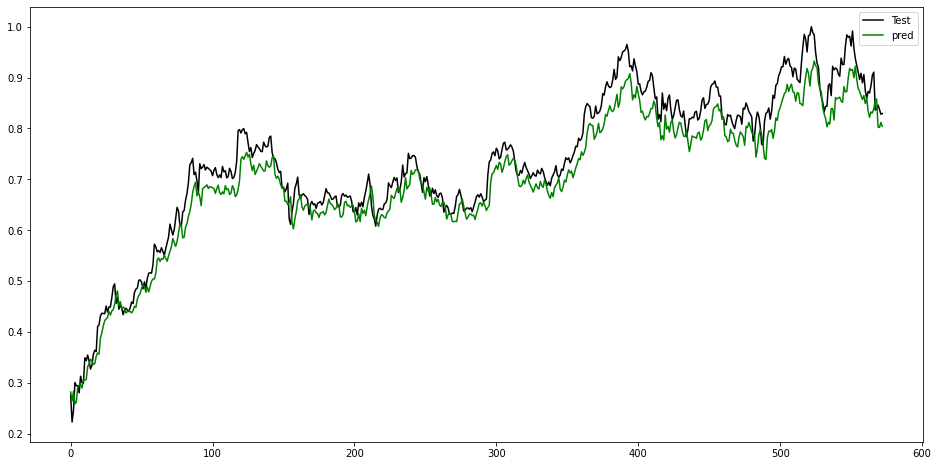

In [17]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()